# Problem Statement
We try to predict the item outlet sales based on item's features.
- Supervised machine learning problem.
- Regression problem.

#### Input item's features:
- Item_Identifier            
- Item_Weight               
- Item_Fat_Content           
- Item_Visibility           
- Item_Type                  
- Item_MRP                   
- Outlet_Identifier          
- Outlet_Establishment_Year  
- Outlet_Size                
- Outlet_Location_Type       
- Outlet_Type 

#### Target:
- Item_Outlet_Sales 


# Loading Packages and Data

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [30]:
# load train data
train_data = pd.read_csv('../dataset/Train.csv')
# load test data
test_data = pd.read_csv('../dataset/Test.csv')

# Explore Data

In [31]:
# get data shape 
print(train_data.shape)
print(test_data.shape)

(8523, 12)
(5681, 11)


In [32]:
# get data info (data types, non_null counts,...)
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Ra

In [33]:
# get data description (count, mean, std, min, max,...)
print(train_data.describe())
print(test_data.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  
       Item_Weight  Item_Visibility     Item_

In [34]:
# Explore data unique values
for column in train_data.columns:
    unique_values = train_data[column].unique()
    print(column, ' -> count:', unique_values.shape)
    
    if(unique_values.shape[0] <= 100):
        print('unique values:', unique_values)
    print('\n')
    
print('----------------------------------------------------------------')
for column in test_data.columns:
    unique_values = train_data[column].unique()
    print(column, ' -> count:', unique_values.shape)
    
    if(unique_values.shape[0] <= 100):
        print('unique values:', unique_values)
    print('\n')

Item_Identifier  -> count: (1559,)


Item_Weight  -> count: (416,)


Item_Fat_Content  -> count: (5,)
unique values: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Item_Visibility  -> count: (7880,)


Item_Type  -> count: (16,)
unique values: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Item_MRP  -> count: (5938,)


Outlet_Identifier  -> count: (10,)
unique values: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Outlet_Establishment_Year  -> count: (9,)
unique values: [1999 2009 1998 1987 1985 2002 2007 1997 2004]


Outlet_Size  -> count: (4,)
unique values: ['Medium' nan 'High' 'Small']


Outlet_Location_Type  -> count: (3,)
unique values: ['Tier 1' 'Tier 3' 'Tier 2']


Outlet_Type  -> count: (4,)
unique values: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Su

In [35]:
# Explore data null values
print(train_data.isnull().sum())
print('----------------------------------------------------------------')
print(test_data.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
----------------------------------------------------------------
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


# Data PreProcessing

In [36]:
# Make Item_Fat_Content has only 2 values
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})
test_data['Item_Fat_Content']  = test_data['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

In [37]:
# handle missing values

# handle missing values in Item_Weight
# numerical -> so we can replace nulls by mean 

train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(),inplace=True)
print(train_data['Item_Weight'].isnull().sum())

test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(),inplace=True)
print(test_data['Item_Weight'].isnull().sum())

# handle missing values in Outlet_Size 
# categorical -> so we can replace nulls by mode 

train_data['Outlet_Size'] = train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode().values[0])
print(train_data['Outlet_Size'].isnull().sum())

test_data['Outlet_Size'] = test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode().values[0])
print(test_data['Outlet_Size'].isnull().sum())

0
0
0
0


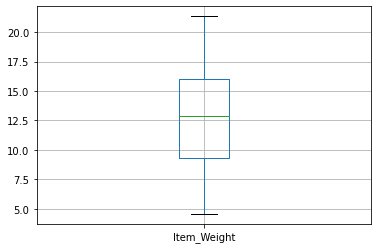

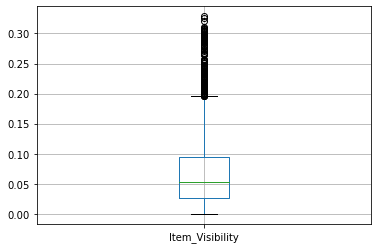

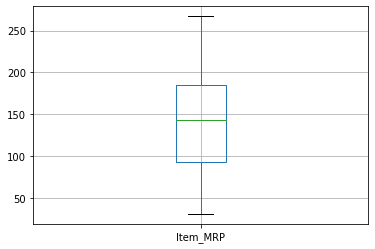

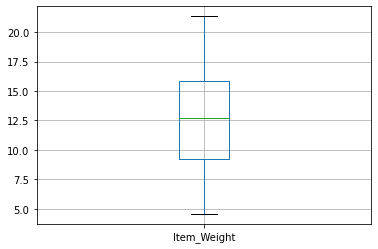

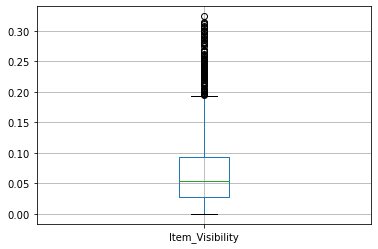

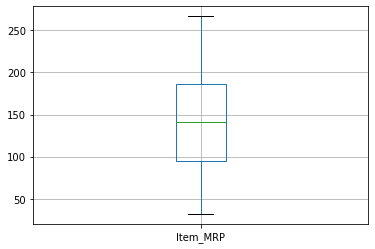

In [39]:
# check for outliers 
# boxplots for numerical columns

# for train data
train_data.boxplot(column=['Item_Weight'])
plt.show()

train_data.boxplot(column=['Item_Visibility'])
plt.show()

train_data.boxplot(column=['Item_MRP'])
plt.show()

# for test data
test_data.boxplot(column=['Item_Weight'])
plt.show()

test_data.boxplot(column=['Item_Visibility'])
plt.show()

test_data.boxplot(column=['Item_MRP'])
plt.show()

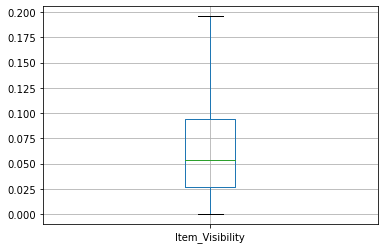

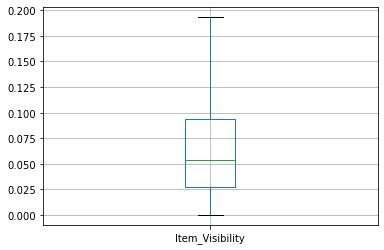

In [40]:
# handle outliers 
# handle outliers in Item_Visibility 

# for train data
Q1 = train_data['Item_Visibility'].quantile(0.25)
Q3 = train_data['Item_Visibility'].quantile(0.75)
lower_range = Q1 - 1.5 * (Q3 - Q1)
upper_range = Q3 + 1.5 * (Q3 - Q1)
train_data['Item_Visibility'] = np.where(train_data['Item_Visibility'] > upper_range, upper_range, train_data['Item_Visibility'])
train_data['Item_Visibility'] = np.where(train_data['Item_Visibility'] < lower_range, lower_range, train_data['Item_Visibility'])

# boxplot after handling outliers
train_data.boxplot(column=['Item_Visibility'])
plt.show()

# for test data
Q1 = test_data['Item_Visibility'].quantile(0.25)
Q3 = test_data['Item_Visibility'].quantile(0.75)
lower_range = Q1 - 1.5 * (Q3 - Q1)
upper_range = Q3 + 1.5 * (Q3 - Q1)
test_data['Item_Visibility'] = np.where(test_data['Item_Visibility'] > upper_range, upper_range, test_data['Item_Visibility'])
test_data['Item_Visibility'] = np.where(test_data['Item_Visibility'] < lower_range, lower_range, test_data['Item_Visibility'])

# boxplot after handling outliers
test_data.boxplot(column=['Item_Visibility'])
plt.show()

In [41]:
# check for duplicated rows
print(train_data.duplicated().sum())

0


In [51]:
print(train_data['Item_Fat_Content'].value_counts(),'\n')
print(train_data['Item_Type'].value_counts(),'\n')
print(train_data['Outlet_Identifier'].value_counts(),'\n')
print(train_data['Outlet_Establishment_Year'].value_counts(),'\n')
print(train_data['Outlet_Size'].value_counts(),'\n')
print(train_data['Outlet_Location_Type'].value_counts(),'\n')
print(train_data['Outlet_Type'].value_counts(),'\n')

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64 

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64 

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: i

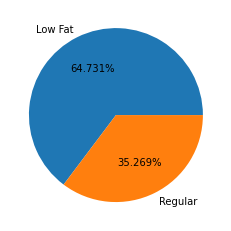

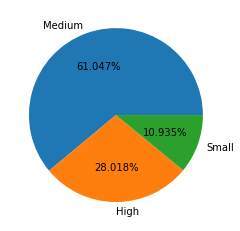

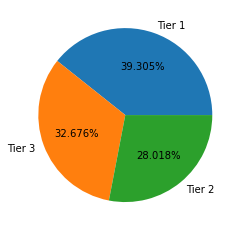

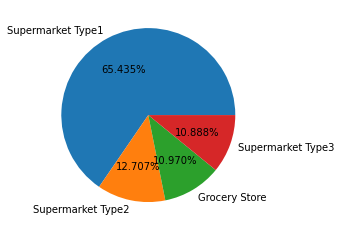

In [42]:
# pie charts for categorical columns with few values
plt.pie(train_data['Item_Fat_Content'].value_counts(),labels=train_data['Item_Fat_Content'].unique(),autopct='%0.3f%%')
plt.show()

plt.pie(train_data['Outlet_Size'].value_counts(),labels=train_data['Outlet_Size'].unique(),autopct='%0.3f%%')
plt.show()

plt.pie(train_data['Outlet_Location_Type'].value_counts(),labels=train_data['Outlet_Location_Type'].unique(),autopct='%0.3f%%')
plt.show()

plt.pie(train_data['Outlet_Type'].value_counts(),labels=train_data['Outlet_Type'].unique(),autopct='%0.3f%%')
plt.show()

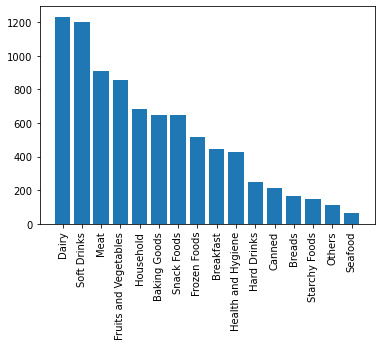

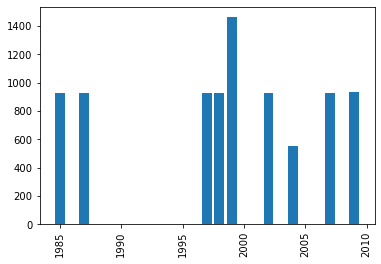

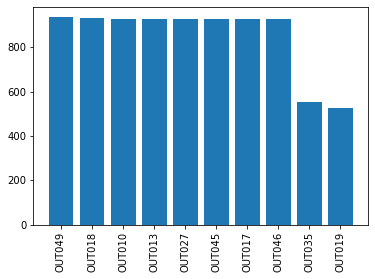

In [53]:
# bar charts for categorical columns with many values
plt.bar(train_data['Item_Type'].unique(),train_data['Item_Type'].value_counts() )
plt.xticks(rotation=90)
plt.show()

plt.bar(train_data['Outlet_Establishment_Year'].unique(),train_data['Outlet_Establishment_Year'].value_counts() )
plt.xticks(rotation=90)
plt.show()

plt.bar(train_data['Outlet_Identifier'].unique(),train_data['Outlet_Identifier'].value_counts() )
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Item_MRP')

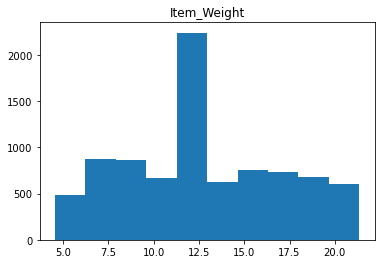

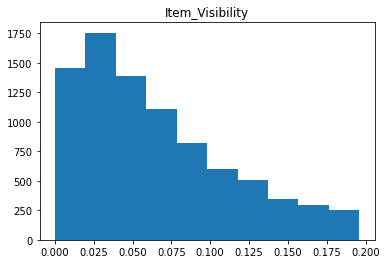

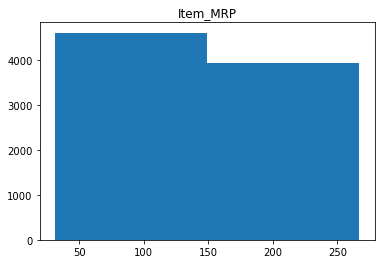

In [49]:
# histograms for numerical columns
fig=plt.figure()
plt.hist(train_data['Item_Weight'],bins = 10)
plt.title('Item_Weight')

fig=plt.figure()
plt.hist(train_data['Item_Visibility'],bins = 10)
plt.title('Item_Visibility')

fig=plt.figure()
plt.hist(train_data['Item_MRP'],bins = 2)
plt.title('Item_MRP')

Text(0.5, 1.0, 'Item_MRP')

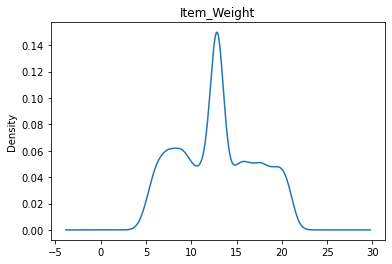

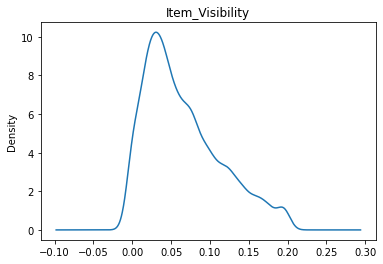

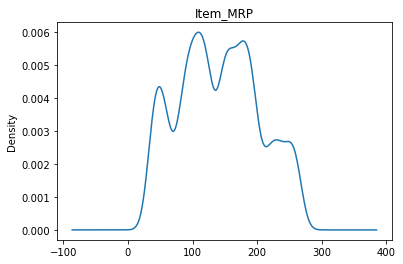

In [50]:
# density plots for numerical columns
fig=plt.figure()
train_data['Item_Weight'].plot(kind='density')
plt.title('Item_Weight')

fig=plt.figure()
train_data['Item_Visibility'].plot(kind='density')
plt.title('Item_Visibility')

fig=plt.figure()
train_data['Item_MRP'].plot(kind='density')
plt.title('Item_MRP')

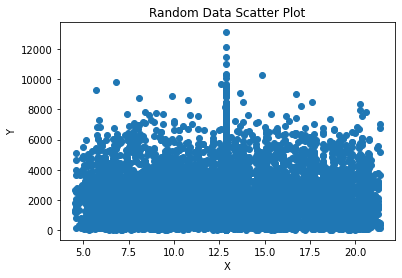

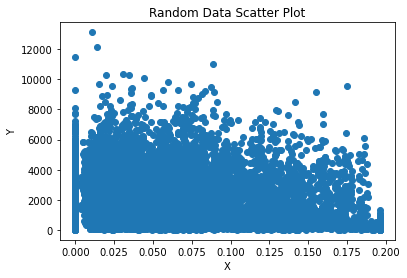

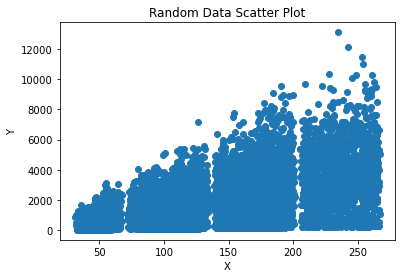

In [56]:
plt.scatter(train_data['Item_Weight'], train_data['Item_Outlet_Sales'])
plt.title('Sales vs Weight')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

plt.scatter(train_data['Item_Visibility'], train_data['Item_Outlet_Sales'])
plt.title('Sales vs Visibility')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

plt.scatter(train_data['Item_MRP'], train_data['Item_Outlet_Sales'])
plt.title('Sales vs MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

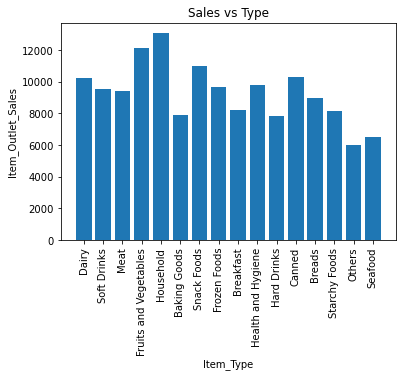

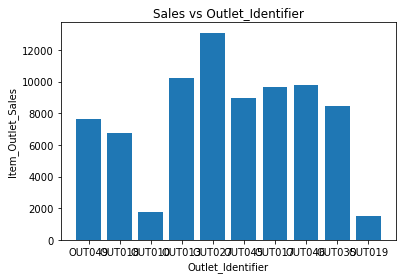

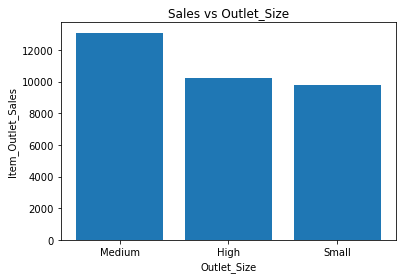

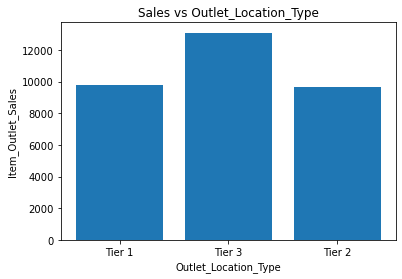

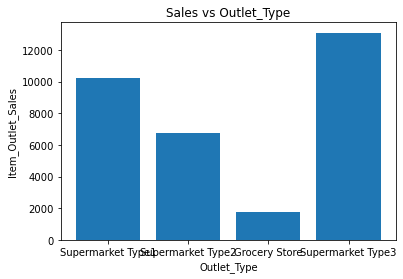

In [61]:
plt.bar(train_data['Item_Type'], train_data['Item_Outlet_Sales'])
plt.title('Sales vs Type')
plt.xlabel('Item_Type')
plt.ylabel('Item_Outlet_Sales')
plt.xticks(rotation=90)
plt.show()

plt.bar(train_data['Outlet_Identifier'], train_data['Item_Outlet_Sales'])
plt.title('Sales vs Outlet_Identifier')
plt.xlabel('Outlet_Identifier')
plt.ylabel('Item_Outlet_Sales')
plt.xticks(rotation=90)
plt.show()

plt.bar(train_data['Outlet_Size'], train_data['Item_Outlet_Sales'])
plt.title('Sales vs Outlet_Size')
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.show()

plt.bar(train_data['Outlet_Location_Type'], train_data['Item_Outlet_Sales'])
plt.title('Sales vs Outlet_Location_Type')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Item_Outlet_Sales')
plt.show()

plt.bar(train_data['Outlet_Type'], train_data['Item_Outlet_Sales'])
plt.title('Sales vs Outlet_Type')
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# correlation analysis
train_data.corr()

In [67]:
# encoding for categorical features
def nominal_label_encoding(feature):
    encoder = LabelEncoder()
    encoded_column = encoder.fit_transform(train_data[feature])
#     print(encoded_column)
    train_data[feature] = encoded_column
    
def ordinal_label_encoding(feature,list_categories):
    encoder = OrdinalEncoder(categories = list_categories)
    encoded_column = encoder.fit_transform(train_data[feature])
#     print(encoded_column)
    train_data[feature] = encoded_column
    
# ordinal_label_encoding('Item_Fat_Content',['Low Fat','Regular'])
# ordinal_label_encoding('Outlet_Size',['Small','Medium','High'])
# ordinal_label_encoding('Outlet_Location_Type',['Tier 1', 'Tier 2', 'Tier 3'])

# nominal_label_encoding('Item_Identifier')
# nominal_label_encoding('Item_Type')
# nominal_label_encoding('Outlet_Identifier')
# nominal_label_encoding('Outlet_Type')

encoder = OrdinalEncoder(categories = ['Low Fat','Regular'])
train_data['Item_Fat_Content'] = encoder.fit_transform(train_data['Item_Fat_Content'])

ValueError: Expected 2D array, got 1D array instead:
array=['Low Fat' 'Regular' 'Low Fat' ... 'Low Fat' 'Regular' 'Low Fat'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Scaling and normalizing 
# scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0, 1))

train_data['Item_Weight'] = scaler.fit_transform(train_data[['Item_Weight']])
train_data['Item_Visibility'] = scaler.fit_transform(train_data[['Item_Visibility']])
train_data['Item_MRP'] = scaler.fit_transform(train_data[['Item_MRP']])

print(train_data.describe())

In [ ]:
# train_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [ ]:
x = train_data[['Item_Weight','Item_Fat_Content', 'Item_Visibility', 'Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
y = train_data['Item_Outlet_Sales']
X_train, X_test, Y_train, Y_test = train_test_split(x,y, random_state=101, test_size=0.2)

In [ ]:
# regression
regressor = LinearRegression()
# x = train_data[['Item_Weight','Item_Fat_Content', 'Item_Visibility', 'Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
# y = train_data['Item_Outlet_Sales']
regressor.fit(X_train, Y_train)
pred = regressor.predict(X_test) 

mse = mean_squared_error(Y_test, pred)
r2 = r2_score(Y_test, pred)

print("Mean Squared Error : ", mse)
print("R-Squared :" , r2)
print("Y-intercept :"  , regressor.intercept_)
print("Slope :" , regressor.coef_) 

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, Y_train)
pred = model.predict(X_test)

mse = mean_squared_error(Y_test, pred)
r2 = r2_score(Y_test, pred)

print("Mean Squared Error : ", mse)
print("R-Squared :" , r2)
print("Y-intercept :"  , regressor.intercept_)
print("Slope :" , regressor.coef_) 

In [ ]:
model = RandomForestRegressor(n_estimators=500)
model.fit(X_train, Y_train)
pred = model.predict(X_test)

mse = mean_squared_error(Y_test, pred)
r2 = r2_score(Y_test, pred)

print("Mean Squared Error : ", mse)
print("R-Squared :" , r2)
print("Y-intercept :"  , regressor.intercept_)
print("Slope :" , regressor.coef_) 

In [ ]:
param_grid = {
    'n_estimators': [10,100],
#     'max_depth': [2, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [0.1, 0.5, 1.0],
    'max_depth':range(1,31),
    
    'min_samples_split':np.linspace(0.1, 1.0, 10), 
    'min_samples_leaf':np.linspace(0.1, 1.0),
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,  scoring='r2', cv=2)
grid_search.fit(X_train, Y_train)
 
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)